In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('wordnet')
stop_words = stopwords.words()
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
from collections import Counter
count = Counter()
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data = pd.read_csv('IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.shape

(50000, 2)

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


[]

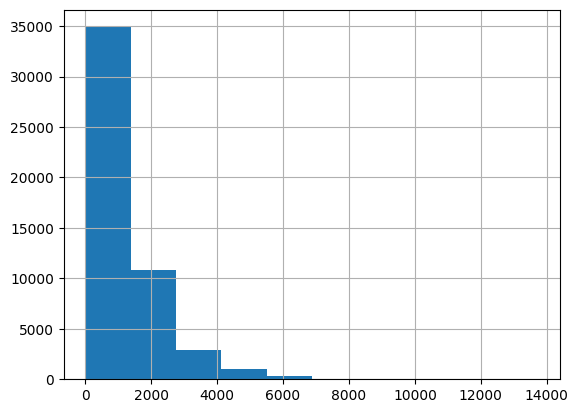

In [ ]:
data['review'].str.len().hist()
plt.plot()

Text(0.5, 1.0, 'Negative reviews')

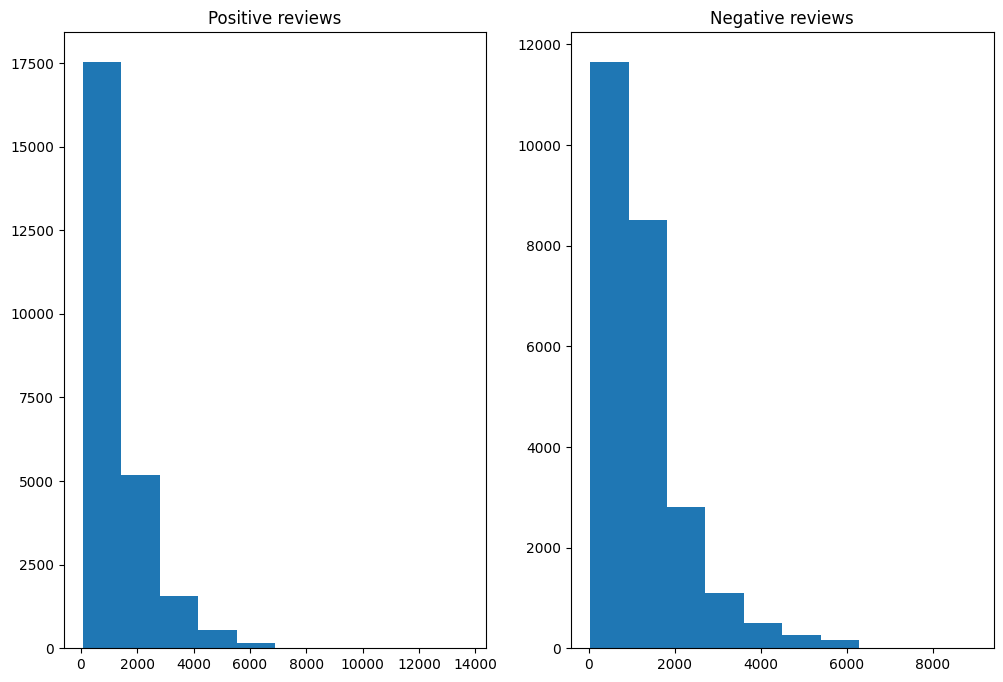

In [ ]:
figure, (x1, x2) = plt.subplots(1, 2, figsize = (12, 8))
x1.hist(data[data['sentiment'] == 'positive']['review'].str.len())
x1.set_title('Positive reviews')
x2.hist(data[data['sentiment'] == 'negative']['review'].str.len())
x2.set_title('Negative reviews')

In [ ]:
def cleaning(review):
    review = review.lower()
    review = re.sub('https?://\S+|www\.\S+', '', review)
    review = re.sub(r'\b\d+\b', '', review)
    review = re.sub('<.*?>+', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\n', '', review)
    review = re.sub('[’“”…]', '', review)
    emoji = re.compile("["
                      u"\U0001F600-\U0001F64F"
                      u"\U0001F300-\U0001F5FF"
                      u"\U0001F680-\U0001F6FF"
                      u"\U0001F1E0-\U0001F1FF"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      "]+", flags = re.UNICODE)
    review = emoji.sub(r'', review)
    review=re.sub("isn't",'is not',review)
    review=re.sub("he's",'he is',review)
    review=re.sub("wasn't",'was not',review)
    review=re.sub("there's",'there is',review)
    review=re.sub("couldn't",'could not',review)
    review=re.sub("won't",'will not',review)
    review=re.sub("they're",'they are',review)
    review=re.sub("she's",'she is',review)
    review=re.sub("There's",'there is',review)
    review=re.sub("wouldn't",'would not',review)
    review=re.sub("haven't",'have not',review)
    review=re.sub("That's",'That is',review)
    review=re.sub("you've",'you have',review)
    review=re.sub("He's",'He is',review)
    review=re.sub("what's",'what is',review)
    review=re.sub("weren't",'were not',review)
    review=re.sub("we're",'we are',review)
    review=re.sub("hasn't",'has not',review)
    review=re.sub("you'd",'you would',review)
    review=re.sub("shouldn't",'should not',review)
    review=re.sub("let's",'let us',review)
    review=re.sub("they've",'they have',review)
    review=re.sub("You'll",'You will',review)
    review=re.sub("i'm",'i am',review)
    review=re.sub("we've",'we have',review)
    review=re.sub("it's",'it is',review)
    review=re.sub("don't",'do not',review)
    review=re.sub("that´s",'that is',review)
    review=re.sub("I´m",'I am',review)
    review=re.sub("it’s",'it is',review)
    review=re.sub("she´s",'she is',review)
    review=re.sub("he’s'",'he is',review)
    review=re.sub('I’m','I am',review)
    review=re.sub('I’d','I did',review)
    review=re.sub("he’s'",'he is',review)
    review=re.sub('there’s','there is',review)


    return review

data2 = data['review'].apply(cleaning)

In [ ]:
data['sentiment']

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
...,...
49995,positive
49996,negative
49997,negative
49998,negative


In [ ]:
data2 = pd.DataFrame(data2)
data2['sentiment'] = data['sentiment']

In [ ]:
data2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [ ]:
data2['removed_stop_w'] = data2['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



In [ ]:
data2

,review,sentiment,removed_stop_w
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...
...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,disagree previous comment side maltin rate exc...


In [ ]:
for text in data2['removed_stop_w'].values:
    for word in text.split():
        count[word]+=1
count.most_common(10)
temp = pd.DataFrame(count.most_common(10))

In [ ]:
temp.columns = ['word', 'count']

In [ ]:
temp

,word,count
0,movie,83576
1,film,74511
2,time,23298
3,story,22062
4,great,17723
5,movies,15447
6,made,15414
7,films,15294
8,make,15284
9,characters,14657


In [ ]:
px.bar(temp, x = 'count', y = 'word', title = 'Common Words', orientation = 'h', width = 700, height = 700)

In [ ]:
frequent_words = set([word for (word, wc) in count.most_common(10)])

In [ ]:
def remove_freq(review):
    return ' '.join([word for word in str(review).split() if word not in frequent_words])

In [ ]:
data2['word_stop_frequency'] = data2['removed_stop_w'].apply(lambda review: remove_freq(review))

In [ ]:
data2.head()

,review,sentiment,removed_stop_w,word_stop_frequency
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...


In [ ]:
data2['removed_stop_w'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [ ]:
data2['word_stop_frequency'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

In [ ]:
word_net_lemm = WordNetLemmatizer()

In [ ]:
data2['word_stop_frequency_lemm'] = data2['word_stop_frequency'].apply(word_net_lemm.lemmatize)

In [ ]:
data2

,review,sentiment,removed_stop_w,word_stop_frequency,word_stop_frequency_lemm
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically theres a family where a little boy j...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...
...,...,...,...,...,...
49995,i thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...,job creative original expecting lotta fun dvd ...,job creative original expecting lotta fun dvd ...
49996,bad plot bad dialogue bad acting idiotic direc...,negative,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...,plot dialogue acting idiotic directing annoyin...
49997,i am a catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...,catholic taught parochial elementary schools n...
49998,im going to have to disagree with the previous...,negative,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...,disagree previous comment side maltin rate exc...


In [ ]:
data3 = data2.drop(columns = ['review', 'removed_stop_w', 'word_stop_frequency'])

In [ ]:
data3.columns = ['sentiment', 'review']

In [ ]:
data3.sentiment = [0 if each == 'negative' else 1 for each in data3.sentiment]

In [ ]:
data3

,sentiment,review
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...
...,...,...
49995,1,job creative original expecting lotta fun dvd ...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,disagree previous comment side maltin rate exc...


In [ ]:
tokenized_review = data3['review'].apply(lambda x: x.split())

In [ ]:
tokenized_review.head(5)

,review
0,"[reviewers, mentioned, watching, oz, episode, ..."
1,"[wonderful, production, filming, technique, un..."
2,"[wonderful, spend, hot, summer, weekend, sitti..."
3,"[basically, family, boy, jake, thinks, zombie,..."
4,"[petter, matteis, love, money, visually, stunn..."


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words = 'english', ngram_range = (1, 1), tokenizer = token.tokenize)

In [ ]:
text_counts = cv.fit_transform(data3['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
X = text_counts
Y = data3['sentiment']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

In [ ]:
CNB = ComplementNB()
CNB.fit(X_train, Y_train)

ComplementNB()

In [ ]:
predicted = CNB.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(predicted, Y_test)

In [ ]:
accuracy*100

86.22

In [ ]:
print(confusion_matrix(Y_test, predicted))

[[4327  650]
 [ 728 4295]]


In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.86      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predicted = MNB.predict(X_test)
accuracy_nb = metrics.accuracy_score(predicted, Y_test)

In [ ]:
accuracy_nb*100

86.21

In [ ]:
print(confusion_matrix(Y_test, predicted))

[[4327  650]
 [ 729 4294]]


In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
predicted = BNB.predict(X_test)
accuracy = metrics.accuracy_score(predicted,Y_test)

In [ ]:
accuracy*100

83.75

In [ ]:
print(confusion_matrix(Y_test, predicted))

[[4403  574]
 [1051 3972]]


In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4977
           1       0.87      0.79      0.83      5023

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
LSVC = LinearSVC()
LSVC.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [ ]:
predicted = LSVC.predict(X_test)
accuracy_svc = accuracy_score(Y_test, predicted)

In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4977
           1       0.85      0.87      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
RFC = RandomForestClassifier(n_estimators = 100, random_state = 42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predicted_ = RFC.predict(X_test)
accuracy_rfc = accuracy_score(Y_test, predicted)

In [ ]:
accuracy_rfc

0.8561

In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4977
           1       0.85      0.87      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
svd = TruncatedSVD(n_components=300)
X_reduced = svd.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
predicted = knn_model.predict(X_test)
accuracy_knn = accuracy_score(Y_test, predicted)

In [ ]:
accuracy_knn*100

67.78999999999999

In [ ]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4961
           1       0.66      0.73      0.70      5039

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
comparision = pd.DataFrame({
    'Model': ['Multinomial NB', 'Linear SVC', 'Random Forest', 'K-Nearest Neighbour'],
    'Accuracy': [accuracy_nb, accuracy_svc, accuracy_rfc, accuracy_knn]
})

In [ ]:
comparision

,Model,Accuracy
0,Multinomial NB,0.8621
1,Linear SVC,0.8561
2,Random Forest,0.8561
3,K-Nearest Neighbour,0.6779


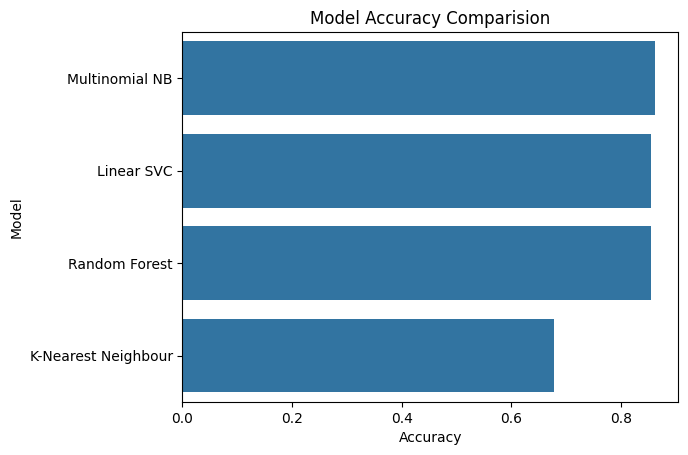

In [ ]:
sns.barplot(x = 'Accuracy', y = 'Model', data = comparision)
plt.title('Model Accuracy Comparision')
plt.show()